# Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
#change path
df = pd.read_csv(r"C:\Users\Gurram Yashaswi\OneDrive\Desktop\ml_miniproj\c-section\12\caesarian.csv")

In [3]:
df.head()
len(df)

80

In [4]:
#checking for duplicates
df['is_duplicated'] = df.duplicated()
df['is_duplicated'].value_counts()


False    80
Name: is_duplicated, dtype: int64

In [5]:
#no duplicates
#if yes below will clear out
df[df['is_duplicated']==1].head()
df['duplicated_condition'] = df.drop(['Caesarian', 'is_duplicated'], axis = 1).duplicated()
df['duplicated_condition'].value_counts()
df[df['duplicated_condition']==1].head()

,id,Age,Delivery number,Delivery time,Blood pressure,Heart problem,Caesarian,is_duplicated,duplicated_condition


In [6]:
#visualsing health condition and delivery history
df[['Age','Delivery number','Caesarian']].describe()

,Age,Delivery number,Caesarian
count,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.575000
std,5.017927,0.794662,0.497462
min,17.000000,1.000000,0.000000
25%,25.000000,1.000000,0.000000
50%,27.000000,1.000000,1.000000
75%,32.000000,2.000000,1.000000
max,40.000000,4.000000,1.000000


In [7]:
# Breakdown of C-section occurences or not(probability)
df['Caesarian'].value_counts()/80

1    0.575
0    0.425
Name: Caesarian, dtype: float64

#ploting

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Gurram Yashaswi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gurram Yashaswi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gurram Yashaswi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

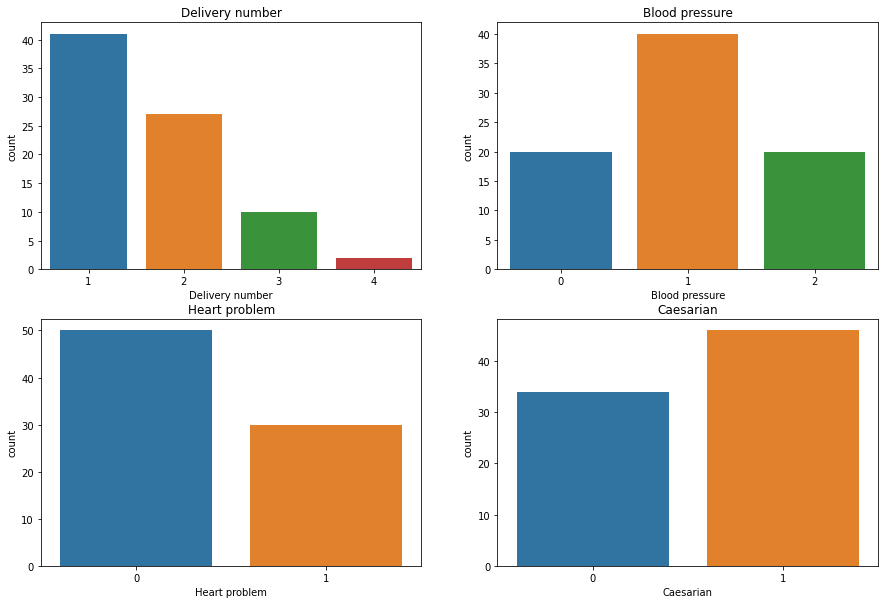

In [9]:
# Plotting countplot

fig = plt.figure(figsize=(15,10))

fig.add_subplot(221)
plt.title('Delivery number', fontsize=12)
sns.countplot(df['Delivery number'])

fig.add_subplot(2,2,2)
plt.title('Blood pressure', fontsize=12)
sns.countplot(df['Blood pressure'])

fig.add_subplot(223)
plt.title('Heart problem', fontsize=12)
sns.countplot(df['Heart problem'])

fig.add_subplot(2,2,4)
plt.title('Caesarian', fontsize=12)
sns.countplot(df['Caesarian'])

plt.show()

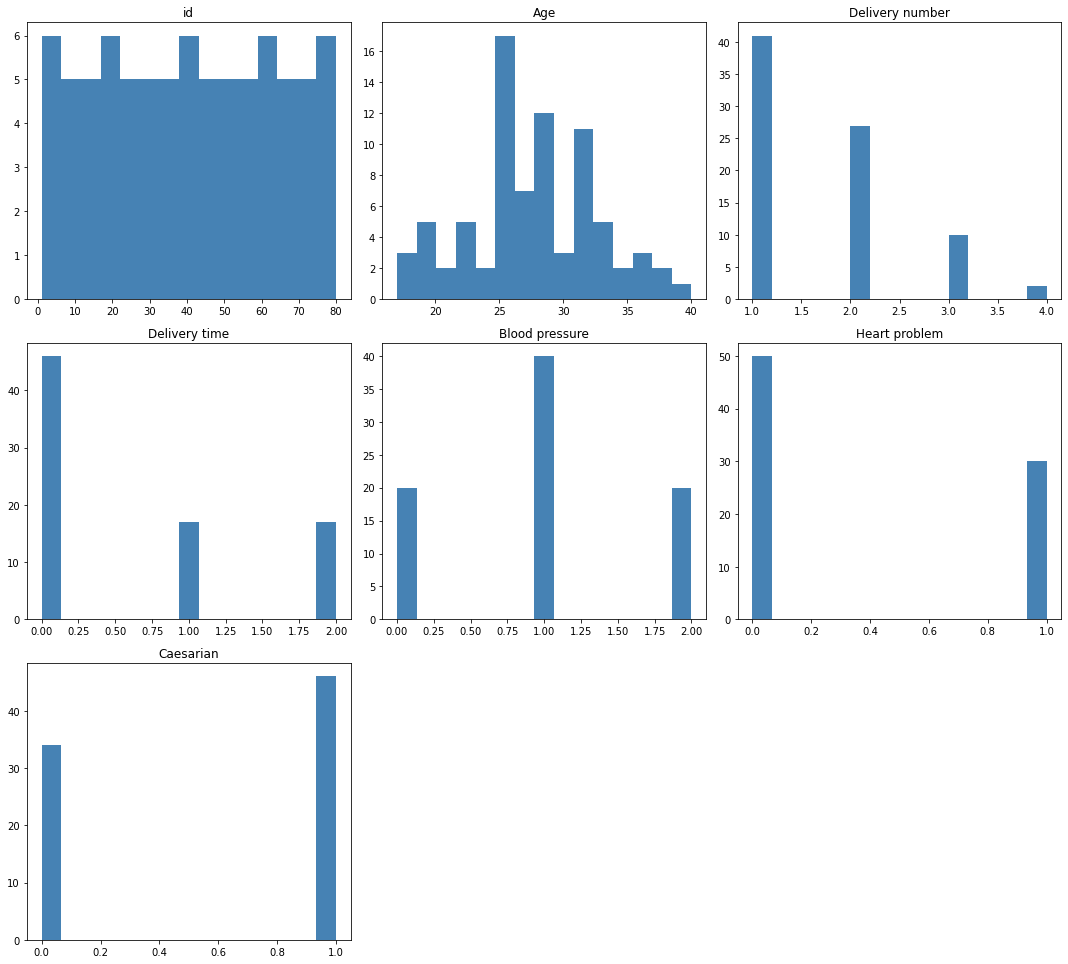

In [10]:
fig = df.hist(bins=15,
                 color='steelblue',
                 #edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 #xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

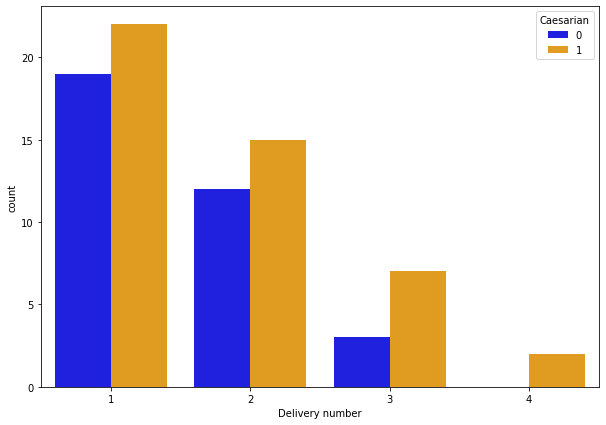

In [11]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="Delivery number", 
                   hue="Caesarian", 
                   palette={1: "orange", 0: "blue"})
plt.title("Delivery number")

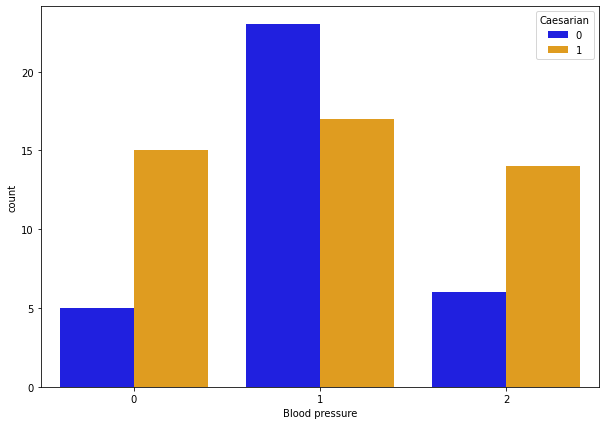

In [12]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="Blood pressure", 
                   hue="Caesarian", 
                   palette={1: "orange", 0: "blue"})

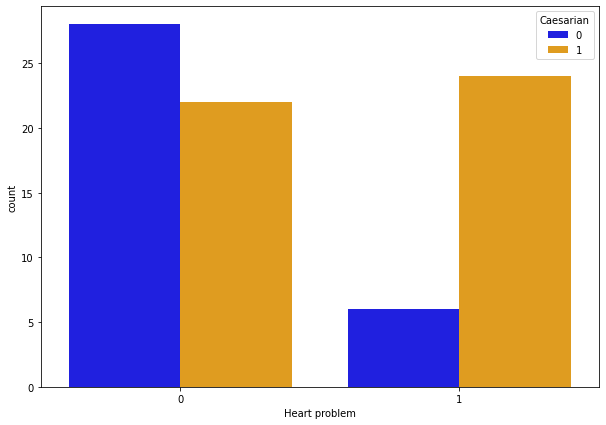

In [13]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="Heart problem", 
                   hue="Caesarian", 
                   palette={1: "orange", 0: "blue"})

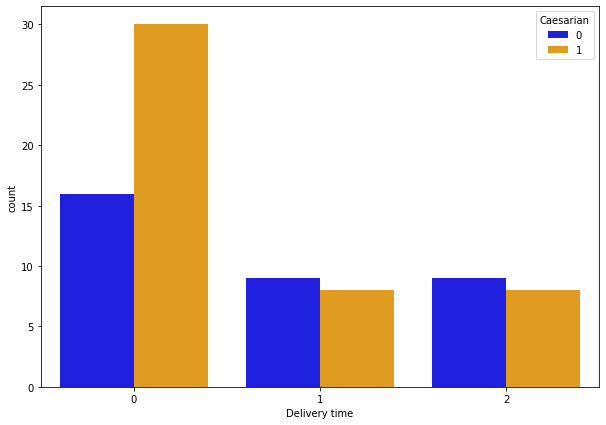

In [14]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="Delivery time", 
                   hue="Caesarian", 
                   palette={1: "orange", 0: "blue"})

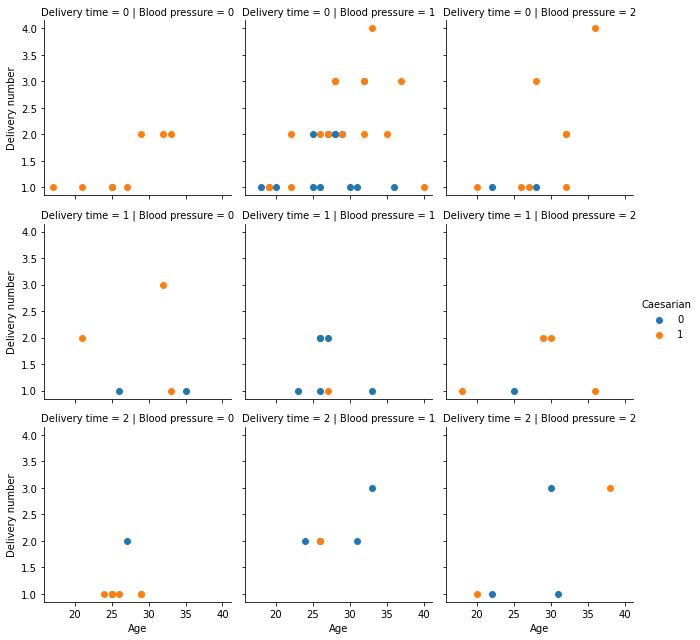

In [15]:
g = sns.FacetGrid(df, col="Blood pressure",  row="Delivery time",hue='Caesarian')
g = g.map(plt.scatter, "Age", "Delivery number").add_legend()

# Algorithm

In [16]:
# Define the variables
X = df.drop('Caesarian', axis =1)
y = df['Caesarian']

In [17]:
# Take care of categorical data using dummy variables
columns_to_encode = ['Delivery time', 'Blood pressure', 'Heart problem']
encoded_columns = pd.get_dummies(df[columns_to_encode],columns=columns_to_encode,drop_first=True)
encoded_columns.head()

,Delivery time_1,Delivery time_2,Blood pressure_1,Blood pressure_2,Heart problem_1
0,0,0,0,1,0
1,0,0,1,0,0
2,1,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [18]:
encoded_columns = encoded_columns.values

In [19]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
columns_to_scale = ['Age','Delivery number']
scaled_columns = sc_X.fit_transform(df[columns_to_scale])

In [20]:
X = np.concatenate([encoded_columns, scaled_columns], axis = 1)

# Training and Test set

In [22]:
# Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
y_test.value_counts()

0    12
1    12
Name: Caesarian, dtype: int64

# decision tree and random forest

In [24]:
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [25]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('ID3', DecisionTreeClassifier()))     #ID3,C4.5,CART are decision tree algorithms
models.append(('RF', RandomForestClassifier(n_estimators = 10)))  

In [26]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ID3: 0.520000 (0.210396)
RF: 0.470000 (0.202457)


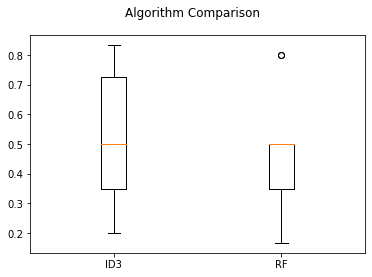

In [27]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Modeling

In [28]:
def models(X_train,y_train):

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
  forest.fit(X_train, y_train)
      
  print('[0]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[1]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
  return  tree, forest 

model = models(X_train,y_train)

[0]Decision Tree Classifier Training Accuracy: 0.9642857142857143
[1]Random Forest Classifier Training Accuracy: 0.9464285714285714


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
for i in range(len(model)):
  print('Model ',i)
  #Check Accuracy precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print(F'Accuracy:',accuracy_score(y_test, model[i].predict(X_test)))
  print(F'Precision:', precision_score(y_test, model[i].predict(X_test)))
  print(F'Recall:', recall_score(y_test, model[i].predict(X_test)))
  print(F'F1 Score:', f1_score(y_test, model[i].predict(X_test)))

  #Check Roc Auc Score
  print( F'Roc Auc Score:',roc_auc_score(y_test, model[i].predict(X_test)) )
  print( F'Balanced Accuracy Score:',balanced_accuracy_score(y_test, model[i].predict(X_test)) ) 
  print( F'Confusion Matrix:',confusion_matrix(y_test, model[i].predict(X_test)) )
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.57      0.67      0.62        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24

Accuracy: 0.5833333333333334
Precision: 0.5714285714285714
Recall: 0.6666666666666666
F1 Score: 0.6153846153846153
Roc Auc Score: 0.5833333333333333
Balanced Accuracy Score: 0.5833333333333333
Confusion Matrix: [[6 6]
 [4 8]]

Model  1
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.67      0.67      0.67        12

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.67      0.67      0.67        24

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.666

Model  0


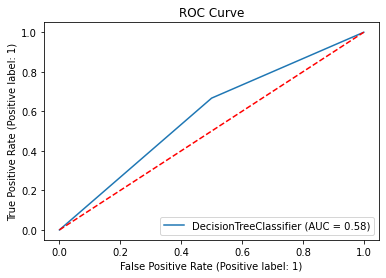

Model  1


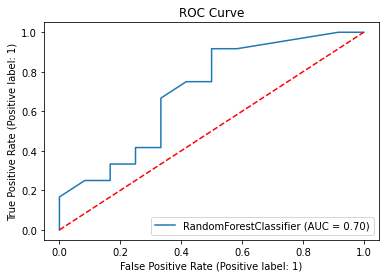

In [30]:
for i in range(len(model)):
  print('Model ',i)
# ROC CURVE
  plot_roc_curve(model[i], X_test, y_test)
  plt.title('ROC Curve')
  plt.plot([0, 1], [0, 1], 'r--')
  plt.show()

In [31]:
#Print Prediction of decision tree Classifier model
pred = model[0].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(y_test)

[0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0]

50    0
27    0
30    0
77    1
45    1
71    1
66    1
68    1
48    0
69    0
40    1
63    1
2     0
72    0
52    0
34    1
3     0
22    0
7     1
26    1
42    1
38    0
41    1
79    0
Name: Caesarian, dtype: int64


In [32]:
#Print Prediction of Random Forest Classifier model
pred = model[1].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(y_test)

[1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0]

50    0
27    0
30    0
77    1
45    1
71    1
66    1
68    1
48    0
69    0
40    1
63    1
2     0
72    0
52    0
34    1
3     0
22    0
7     1
26    1
42    1
38    0
41    1
79    0
Name: Caesarian, dtype: int64


In [33]:
#Accuracy Score
acc_0 = 0.58 
acc_1 = 0.66

results = pd.DataFrame([["Decision Tree",acc_0],["Random Forest",acc_1]],
                        columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)


results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score
1,Random Forest,0.660000
0,Decision Tree,0.580000


In [37]:
# Precision Score
pre_0 = 0.57 
pre_1 = 0.66

results = pd.DataFrame([["Decision Tree",pre_0],["Random Forest",pre_1]],
                        columns = ["Models","Precision Score"]).sort_values(by='Precision Score',ascending=False)


results.style.background_gradient(cmap='Blues')

,Models,Precision Score
1,Random Forest,0.660000
0,Decision Tree,0.570000


In [38]:
rec_0 = 0.66 
rec_1 = 0.66

results = pd.DataFrame([["Decision Tree",rec_0],["Random Forest",rec_1]],
                        columns = ["Models","Recall Score"]).sort_values(by='Recall Score',ascending=False)


results.style.background_gradient(cmap='Blues')

,Models,Recall Score
0,Decision Tree,0.660000
1,Random Forest,0.660000
